### <b> Dominik Szot <br> 16.03.2023 Laboratorium 02  <br> Metoda najmniejszych kwadratów </b>

<b> Zadanie 1</b>

Celem zadania jest zastosowanie metody najmniejszych kwadratów do predykcji, czy nowotwór jest złośliwy (ang. malignant) czy łagodny (ang. benign). <br>
Nowotwory złośliwe i łagodne mają różne charakterystyki wzrostu. Istotne cechy to m. in. promień i tekstura. <br>
Charakterystyki te wyznaczane są poprzez diagnostykę obrazową i biopsje. <br>
Do rozwiązania problemu wykorzystamy bibliotekę pandas, typ DataFrame oraz dwa zbiory danych: <br>
* breast-cancer-train.dat
* breast-cancer-validate.dat.

Nazwy kolumn znajdują się w pliku breast-cancer.labels. Pierwsza kolumna to identyfikator pacjenta patient ID. <br> 
Dla każdego pacjenta wartość w kolumnie Malignant/Benign wskazuje klasę, tj. czy jego nowotwór jest złośliwy czy łagodny. <br> 
Pozostałe 30 kolumn zawiera cechy, tj. charakterystyki nowotworu.

* (a) Otwórz zbiory breast-cancer-train.dat i breast-cancer-validate.dat używając funkcji pd.io.parsers.read csv z biblioteki pandas. <br>

* (b) Stwórz histogram i wykres wybranej kolumny danych przy pomocy funkcji hist oraz plot. Pamiętaj o podpisaniu osi i wykresów. <br>

* (c) Stwórz reprezentacje danych zawartych w obu zbiorach dla liniowej i kwadratowej metody najmniejszych kwadratów (łącznie 4 macierze).  <br> 
Dla reprezentacji kwadratowej użyj tylko podzbioru dostępnych danych, tj. danych z
kolumn radius (mean), perimeter (mean), area (mean), symmetry (mean). <br>

* (d) Stwórz wektor b dla obu zbiorów (tablicę numpy 1D-array o rozmiarze identycznym jak rozmiar kolumny Malignant/Benign odpowiedniego zbioru danych). Elementy wektora b to $ 1 $ jeśli nowotwór jest złośliwy, $ -1 $ w przeciwnym wypadku. <br>

* (e) Znajdź wagi dla liniowej oraz kwadratowej reprezentacji najmniejszych kwadratów przy pomocy macierzy A zbudowanych na podstawie zbioru
breast-cancer-train.dat. Potrzebny będzie także wektor b zbudowany
na podstawie zbioru breast-cancer-train.dat. <br>
Uwaga. Problem najmniejszych kwadratów można rozwiązać stosując równanie normalne lub używając funkcji `scipy.linalg.pinv` lub
`scipy.linalg.lstsq`. <br>

* (f) Oblicz współczynnik uwarunkowania, cond. <br>

* (g) Sprawdź jak dobrze otrzymane wagi przewidują typ nowotworu (łagodny
czy złośliwy). W tym celu pomnóż liniową reprezentację zbioru
breast-cancer-validate.dat oraz wyliczony wektor wag dla reprezentacji
liniowej. Następnie powtórz odpowiednie mnożenie dla reprezentacji kwadratowej. Zarówno dla reprezentacji liniowej jak i kwadratowej otrzymamy
wektor p. Zakładamy, że jeśli $ p[i] > 0 $, to i-ta osoba (prawdopodobnie) ma
nowotwór złośliwy. Jeśli $ p[i] ≤ 0 $ to i-ta osoba (prawdopodobnie) ma nowotwór łagodny.
Porównaj wektory p dla reprezentacji liniowej i kwadratowej z wektorem b
(użyj reguł $ p[i] > 0 $ oraz  $ p[i] ≤ 0 $).
Oblicz liczbę fałszywie dodatnich (ang. false-positives) oraz fałszywie ujemnych (ang. false-negatives) przypadków dla obu reprezentacji. Przypadek
fałszywie dodatni zachodzi gdy model przewiduje nowotwór złośliwy, gdy w
rzeczywistości nowotwór był łagodny. Przypadek fałszywie ujemny zachodzi gdy model przewiduje nowotwór łagodny, gdy w rzeczywistości nowotwór
był złośliwy

Pierwszym krokiem w celu rozwiązania problemu będzie import potrzebnych bibliotek, oraz zaczytanie zbiorów danych

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp

with open("breast-cancer.labels","r") as f:
    labels = [line.rstrip() for line in f]
    
train_data= pd.read_csv('breast-cancer-train.dat', names=labels)
validate_data= pd.read_csv('breast-cancer-validate.dat', names=labels)


Histogram przedstawiający rozkład średniej wartości "radius", oraz wykres średniej wartości "area" w zależności od i-tej badanej osoby

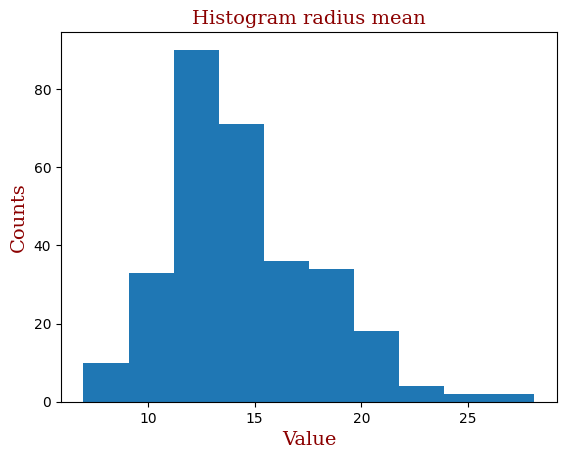

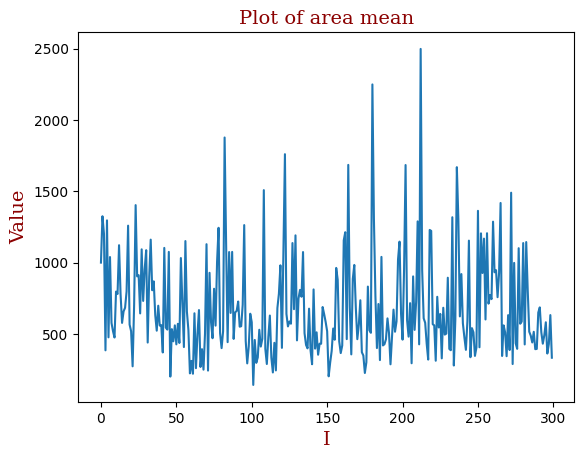

In [5]:
radius_mean = train_data['radius (mean)']
area_mean = train_data['area (mean)']

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
}

fig, plot = plt.subplots(1, 1)

plt.hist(radius_mean)
plot.set_title("Histogram radius mean", fontdict=font)
plot.set_xlabel("Value", fontdict=font)
plot.set_ylabel("Counts", fontdict=font)
plt.show()

plt.plot(area_mean)
plt.title("Plot of area mean", fontdict=font)
plt.xlabel("I", fontdict=font)
plt.ylabel("Value", fontdict=font)
plt.show()

Tworzenie reprezentacji danych ze zbiorów dla liniowej i kwadratowej macierzy.  
$$A_{lin} = \begin{bmatrix} f_{1,1} & f_{1,2} & f_{1,3} & f_{1,4} \\f_{2,1} & f_{2,2} & f_{2,3} & f_{2,4} \\ ... & ... & ... & ... \\ f_{n,1} & f_{n,2} & f_{n,3} & f_{n,4} \end{bmatrix}$$


$$A_{quad} = \begin{bmatrix} f_{1,1} & f_{1,2} & f_{1,3} & f_{1,4} & f_{1,1}^2 & f_{1,2}^2 & f_{1,3}^2 & f_{1,4}^2 & f_{1,1}f_{1,2} & f_{1,1}f_{1,3} & f_{1,1}f_{1,4} & f_{1,2}f_{1,3} & f_{1,2}f_{1,4} & f_{1,3}f_{1,4} \\ ...  \\ f_{n,1} & f_{n,2} & f_{n,3} & f_{n,4} & f_{n,1}^2 & f_{n,2}^2 & f_{n,3}^2 & f_{n,4}^2 & f_{n,1}f_{n,2} & f_{n,1}f_{n,3} & f_{n,1}f_{n,4} & f_{n,2}f_{n,3} & f_{n,2}f_{n,4} & f_{n,3}f_{n,4} \end{bmatrix}$$

In [6]:
def quadric_representation(data):
    A_quadratic_representation = np.zeros((len(data), 14))
    
    for i in range(len(A_quadratic_representation)):
        for j in range(4):
            A_quadratic_representation[i][j] = data[i][j]

        for j in range(4, 8):
            A_quadratic_representation[i][j] = data[i][j-4]**2
            
        x = 0
        for m in range(6):
            for n in range(m+1, 4):
                A_quadratic_representation[i][8+x] = data[i][m] * data[i][n]
                x+=1
    
    return A_quadratic_representation


In [7]:
# Tworze reprezentacje macierzowe na podstawie danych
A_linear_train = np.array(train_data.iloc[:, 2:len(train_data.columns)].values)

train_quadratic_data = train_data.loc[:, ["radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]].values
A_train_quadratic_representation = np.array(quadric_representation(train_quadratic_data))

A_linear_validate = np.array(validate_data.iloc[:, 2:len(validate_data.columns)].values)
validate_quadratic_data = validate_data.loc[:, ["radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]].values
A_validate_quadratic_representation = np.array(quadric_representation(validate_quadratic_data))

Dla obu zbiorów tworzymy wektor b

In [8]:
train_b = train_data.loc[:,["Malignant/Benign"]].values

for i in range(len(train_b)):
       train_b[i] = 1. if (train_b[i][0] == 'M') else -1.
       

validate_b = validate_data.loc[:,["Malignant/Benign"]].values

for i in range(len(validate_b)):
       validate_b[i] = 1. if (validate_b[i][0] == 'M') else -1.


W celu obliczenia wagi dla liniowej i kwadratowej reprezentacji najmniejszyk kwadratów dla zbioru ```breast-cancer-train``` skorzystam z własności 
$$ w = (A^TA)^{-1}A^Tb $$

Aby obliczyć ```współczynnik uwarunkowania``` posłużę się z kolei wzorem 
$$ cond(A) = ||A|| * ||A^{-1}|| $$


In [9]:
AT = np.transpose(A_linear_train)
ATA = np.linalg.inv(np.dot(AT, A_linear_train))
w = np.dot(np.dot(ATA, AT), train_b)

BT = np.transpose(A_train_quadratic_representation)
BTB = np.linalg.inv(np.dot(BT, A_train_quadratic_representation))
w2 = np.dot(np.dot(BTB, BT), train_b)

In [10]:
cond_linear = np.dot(np.linalg.norm(A_linear_train), np.linalg.norm(np.linalg.pinv(A_linear_train)))
cond_quadric = np.dot(np.linalg.norm(A_train_quadratic_representation), np.linalg.norm(np.linalg.pinv(A_train_quadratic_representation)))

print(cond_linear, cond_quadric)

1963526.5116153907 1058220805.6497791


Aby sprawdzić jak otrzymane wagi przewiduja typ nowotworu mnożę liniową reprezentację zbioru ```breast-cancer-validate.dat``` oraz wyliczony wektor wag w orzymując wektor p.
Zgodnie z założeniami zadania zakładamy że i-ta osoba ma nowotwór złośliwy jeśli wartość ```p[i]``` jest większa od 0. 

Następnie porównuję otrzymane wyniki z wynikami rzeczywistymi

* Nasza reprezentacja wskazała dla reprezentacji liniowej ```6``` wyników fałszywie pozytwynych a ```2``` wyniki fałszywie negatywne
* Dla reprezentacji kwadratowej było to już ```15``` wyników fałszywie pozytwynych oraz  ```5``` wyników fałszywie negatywnych

Bardziej skuteczną reprezentacja danych okazała się reprezentacja liniowa, która osiągnęła skutecznosć na poziomie ```96.92% ```
Potwierdza to również wynik obliczeń wskaźnika uwarukowania, który był bardziej korzystniejszy dla reprezentacji liniowej

In [11]:
p = np.dot(A_linear_validate,w)
p2 = np.dot(A_validate_quadratic_representation,w2)

for i in range(len(p)):
    p[i] = 1. if p[i] > 0 else -1

for i in range(len(p2)):
    p2[i] = 1. if p2[i] > 0 else -1

false_positives = 0 
false_negatives = 0

false_positives_q = 0 
false_negatives_q = 0

solution = validate_data.loc[:, ["Malignant/Benign"]].values

for i in range(len(solution)):
    solution[i] = 1. if (solution[i][0] == 'M') else -1.

for i in range(len(p)):
    if solution[i] == -1 and p[i] == 1:
        false_positives += 1

    if solution[i] == 1 and p[i] == -1:
        false_negatives += 1

    if solution[i] == -1 and p2[i] == 1:
        false_positives_q += 1
        
    if solution[i] == 1 and p2[i] == -1:
        false_negatives_q += 1

efficiency1 = (len(p) - (false_positives+false_negatives))/len(p)*100    
efficiency2 = (len(p) - (false_positives_q+false_negatives_q))/len(p)*100        
        
print(f'false-positives: {false_positives}')
print(f'false-negatives: {false_negatives}')

print(f'false-positives-q: {false_positives_q}')
print(f'false-negatives-q: {false_negatives_q}')

print(f'Skutecznosć {efficiency1:.2f}% dla reprezentacji liniowej, {efficiency2:.2f}% dla reprezentacji kwadratowej')


false-positives: 6
false-negatives: 2
false-positives-q: 15
false-negatives-q: 5
Skutecznosć 96.92% dla reprezentacji liniowej, 92.31% dla reprezentacji kwadratowej


| Type | False-Positives | False-Negatives |
| :-: |:-: | :-: | 
| Linear | 6 | 2 | 
| Qadratic | 15 | 5 |

Bibliografia 
* Katarzyna Rycerz: Wykład z przedmiotu Metody Obliczeniowe w Nauce i Technice
* Marcin Kuta: Materiały z zajęć - Least squares method